### Reload Full Size RGB Images from CSV
#### Extract HOG feature
#### Extract BRISK feature
#### Remap to 50% size and gray scale images
#### Export each vector independently to be used independently


In [1]:
# Load packages
import pandas as pd
import numpy as np
import cv2 as cv
from skimage.feature import hog
import matplotlib.pyplot as plt

In [2]:
label_key = {
    "Pants": 0, 
    "Tshirts":1,
    "Watches":2, 
    "Casual Shoes":3 
 
}

In [3]:
def display_featimg_against_original_wrapper(feat_imgs, data_orig):
  # feature images and data images must be idx aligned for labels to match
  for i, feat_img in enumerate(feat_imgs):
    article_type = data_orig[['articleType']]
    label = article_type.iloc[i]['articleType']

    imgs = data_orig[['image']]
    original_img = imgs.iloc[i]['image']

    display_featimg_against_original(feat_img, original_img, label=label)

In [4]:
from PIL import Image
import os
import warnings
import time

def images_to_csv2(column_one, csv_path, column_names, images_df):
    '''encodes an RGB image dataset images_df into rows in a CSV file.
    first column is label and the first pixel is on column 2'''
    # Create a DataFrame to store all image data with column names
    warnings.simplefilter(action='ignore', category=FutureWarning)
    df = pd.DataFrame(columns=column_names)
    start_time = time.time()
    for i in range(images_df.shape[0]):
    #for i in range(5):
        # Convert image data to a 1D array
        img_data = images_df.iloc[i,2].flatten()
        img_data = img_data.astype(int)

        # Create a DataFrame with the label and image data
        img_df = pd.DataFrame([np.insert(img_data, 0, column_one[i])], columns=column_names)

        # Append the image data to the main DataFrame
        df = df.append(img_df, ignore_index=True)
        #df.head(1)
        print('percent complete: %1.4f'%(i/(images_df.shape[0])), end =" - %s seconds -\n" % \
              (time.time() - start_time), flush=True)
    # Write DataFrame to CSV
    #df=df.clip(lower=0)
    df.to_csv(csv_path, index=False, header=True)   

In [5]:
from PIL import Image
import os
import warnings
import time

def csv2_to_img_df(images_df, width, height, channels):
    '''encodes a row vector dataframe into a df of images dataset.
    first column is label and the image is on column image'''
    # Create a DataFrame to store all image data with column names
    warnings.simplefilter(action='ignore', category=FutureWarning)
    column_names = ['label', 'image']
    df = pd.DataFrame(columns=column_names)
    start_time = time.time()
    for i in range(images_df.shape[0]):
    #for i in range(5):
        # Convert image data to a 1D array
        img_data = images_df.iloc[i,1:].values
        #reshape to 3 D
        img_data = np.reshape(img_data, newshape=(height,width,channels))
        img_data = img_data.astype(np.uint8)
        

        # Create a DataFrame with the label and image data
        #img_df = pd.DataFrame([images_df.iloc[i,0], img_data ], columns=column_names)
        img_df = pd.DataFrame([{'label': images_df.iloc[i,0], 'image': img_data}], columns=column_names)          
        
        

        # Append the image data to the main DataFrame
        df = df.append(img_df, ignore_index=True)
        #df.head(1)
        print('percent complete: %1.4f'%(i/(images_df.shape[0])), end =" - %s seconds -\r" % \
              (time.time() - start_time), flush=True)
    # Write DataFrame to CSV
    #df=df.clip(lower=0)
    return df   

In [6]:
from PIL import Image
import os
import warnings
import time

def gray_images_to_csv2(column_one, csv_path, column_names, images_df):
    '''encodes an gray scale image dataset images_df into rows in a CSV file.
    first column is label and the first pixel is on column 2'''
    warnings.simplefilter(action='ignore', category=FutureWarning)
    df = pd.DataFrame(columns=column_names)
    start_time = time.time()
    for i in range(images_df.shape[0]):
    #for i in range(5):
        # Convert image data to a 1D array
        img_data = images_df.iloc[i,3].flatten()
        img_data = img_data.astype(int)

        # Create a DataFrame with the label and image data
        img_df = pd.DataFrame([np.insert(img_data, 0, column_one[i])], columns=column_names)

        # Append the image data to the main DataFrame
        df = df.append(img_df, ignore_index=True)
        #df.head(1)
        print('percent complete: %1.4f'%(i/(images_df.shape[0])), end =" - %s seconds -\r" % \
              round((time.time() - start_time),2), flush=True)
    # Write DataFrame to CSV
    #df=df.clip(lower=0)
    df.to_csv(csv_path, index=False, header=True)   

In [7]:

def resize_dataset_gray(images_df, width, height):
    '''resize the entire dataset'''
    start_time = time.time()
    for i in range(images_df.shape[0]):
        
        #resize image       
        images_df.iat[i,3] = cv.resize(images_df.iloc[i,3], (width, height), interpolation=cv.INTER_LINEAR)
        print('percent complete: %1.4f'%(i/(images_df.shape[0])), end =" --- %s seconds ---\r" % \
              (time.time() - start_time), flush=True)
    return images_df
        
        
    
    
    

In [8]:
def label_column_list(image_df):
    '''deciphers key and returns a list with the labels on image_df with RGB format'''
    column_one =[]
    for i in range(image_df.shape[0]):
        key = image_df.iloc[i,1]
        value = label_key[key]
        column_one.append(value)
    return column_one
    

In [9]:
def column_names(image_df):
    '''returns a list of column names for image_df, 
    which is a dataframe of images
    column 0 = label, column 1 = pixel 1'''
    im_length =  image_df.iloc[0,2].shape[0]*image_df.iloc[0,2].shape[1]*3 #RGB
    column_name =[]
    column_name.append('label')
    for i in range(im_length):
        c_name = "pixel"+str(i)
        column_name.append(c_name)
    return column_name
    

In [10]:
def gray_column_names(image_df):
    '''returns a list with the labels on image_df with grayscale format'''
    im_length =  image_df.iloc[0,3].shape[0]*image_df.iloc[0,3].shape[1]*1 #grayscale
    column_name =[]
    column_name.append('label')
    for i in range(im_length):
        c_name = "pixel"+str(i)
        column_name.append(c_name)
    return column_name
    

In [11]:
def grayscaling(img_df):
    '''converts an entire dataframe img_df of RGB images to grayscale'''
    img_list = []
    for i in range(img_df.shape[0]):
        gray_image = cv.cvtColor(img_df.iloc[i,2], cv.COLOR_BGR2GRAY)
        img_list.append(gray_image)
    img_df['gray_image'] = img_list
    return  img_df
    

In [12]:
def grayscaling2(img_df):    
    '''converts an entire dataframe img_df of RGB images to grayscale'''
    img_list = []
    for i in range(img_df.shape[0]):
        foreground = cv.cvtColor(img_df.iloc[i,1], cv.COLOR_BGR2GRAY)
        img_list.append(foreground)
    img_df['gray_image'] = img_list
    return  img_df
    
    

In [13]:
def plot_vector(row, images_df, width, height, channels):
    '''plots an image in vector form, with label at column 0
    and first pixel at column 1. row is selection of row. 
    images_df is dataframe csv file was loaded to.
    channels is 1 for grayscale, 3 for rgb'''
    img = images_df.iloc[row,1:].values
    img  = np.reshape(img, newshape=(height,width,channels))
    plt.figure(figsize = (28,28))
    f, axarr = plt.subplots(1,1, figsize=(10, 10))
    axarr.imshow(img)
    

In [14]:
def RGB_hog(images_df):
    '''will return a numpy array with label in position 0
    and HOG feature description in the rest
    in a list of numpy arrays'''
    gauss_kernel=5
    orientations=8
    px_per_cell=8
    cells_per_block=2
    block_norm='L2'
    final_fd = [] #final list 
    start_time = time.time()
    for i in range(images_df.shape[0]): #for all rows
        img =  cv.cvtColor(images_df.iloc[i,1], cv.COLOR_BGR2GRAY)
        blur = cv.GaussianBlur(img,(gauss_kernel, gauss_kernel), 0)
        fd, hog_image = hog(blur, \
                            orientations = orientations, \
                            pixels_per_cell = (px_per_cell, px_per_cell), \
                            cells_per_block = (cells_per_block, cells_per_block), \
                            block_norm = block_norm, \
                            visualize = True
                           )
        #retrieve and insert label data
        final_fd.append(np.insert(fd, 0, images_df.iloc[i,0]))
        print('percent complete: %1.4f'%(i/(images_df.shape[0])), end =" - %s seconds -\r" % \
              round((time.time() - start_time),2), flush=True)
        
    return final_fd
        
    

In [15]:
def column_names_for_fd(fd_list):
    '''returns a list of column names for each column for hog fd, 
    fd_list is a list of numpy arrays
    column 0 = label, column 1 = fd_value 1'''
    col_length = fd_list[0].shape[0] 
    column_name =[]
    #first column name in list
    column_name.append('label')
    for i in range(col_length-1):
        c_name = "fd_value"+str(i)
        column_name.append(c_name)
    return column_name
    

In [16]:
from PIL import Image
import os
import warnings
import time

def hog_to_csv(csv_path, column_names, fd_list):
    '''encodes a list of label + hog fd array into rows and columns in a CSV file.
    first column is label and the first fd value is on column 2, etc..'''
    warnings.simplefilter(action='ignore', category=FutureWarning)
    df = pd.DataFrame(columns=column_names)
    start_time = time.time()
    for i in range(len(fd_list)):
        #row format
        new_fd = np.reshape(fd_list[i], (1,len(fd_list[i])))

        # Create a DataFrame with the label and image data
        fd_df = pd.DataFrame(new_fd, columns=column_names)

        df = df.append(fd_df, ignore_index=True)

        print('percent complete: %1.4f'%(i/(len(fd_list))), end =" - %s secs -\r" % \
              round((time.time() - start_time),2), flush=True)
    # Write DataFrame to CSV
    df.to_csv(csv_path, index=False, header=True)  

**Load previously created CSV file with RGB Images**

In [17]:
train_rgb_df = pd.read_csv('output_rgb.csv')

In [18]:
train_rgb_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel14390,pixel14391,pixel14392,pixel14393,pixel14394,pixel14395,pixel14396,pixel14397,pixel14398,pixel14399
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


**plot a row of loaded data for sanity check**

<Figure size 2016x2016 with 0 Axes>

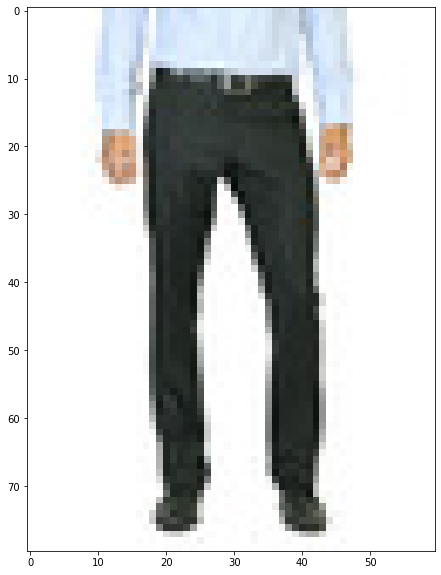

In [24]:
plot_vector(0, train_rgb_df, 60, 80, 3)

<Figure size 2016x2016 with 0 Axes>

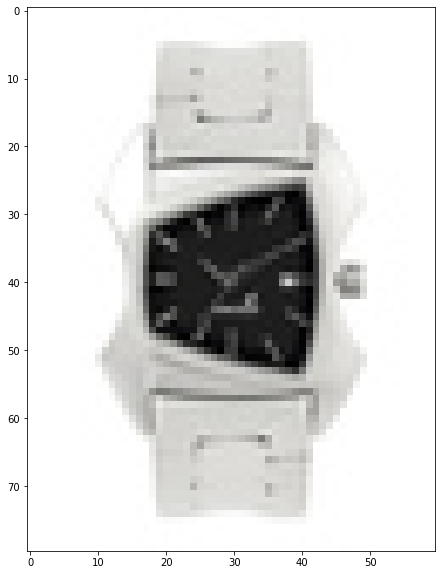

In [174]:
plot_vector(1, train_rgb_df, 60, 80, 3)

**Load rest of images**

In [25]:
test_rgb_df = pd.read_csv('output_rgb_test.csv')

<Figure size 2016x2016 with 0 Axes>

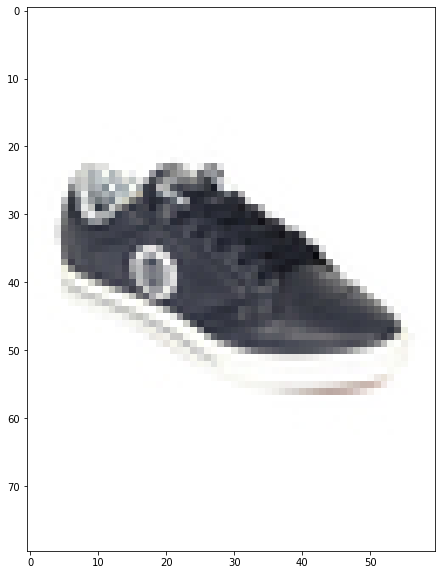

In [176]:
plot_vector(3, test_rgb_df, 60, 80, 3)

In [26]:
val_rgb_df = pd.read_csv('output_rgb_val.csv')

In [27]:
test_rgb_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel14390,pixel14391,pixel14392,pixel14393,pixel14394,pixel14395,pixel14396,pixel14397,pixel14398,pixel14399
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [28]:
test_rgb_df.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel14390,pixel14391,pixel14392,pixel14393,pixel14394,pixel14395,pixel14396,pixel14397,pixel14398,pixel14399
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


### Implement HOG

**Convert RGB in vector format in dataframe to RGB image of 3 dimensions/channels**

In [189]:
#converts RGB in vector format in dataframe to RGB image in 3 dim
train_sample_df = csv2_to_img_df(train_rgb_df, 60, 80, 3)

In [77]:
train_sample_df.head(3)

,label,image
0,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
0,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
0,2,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


<Figure size 2016x2016 with 0 Axes>

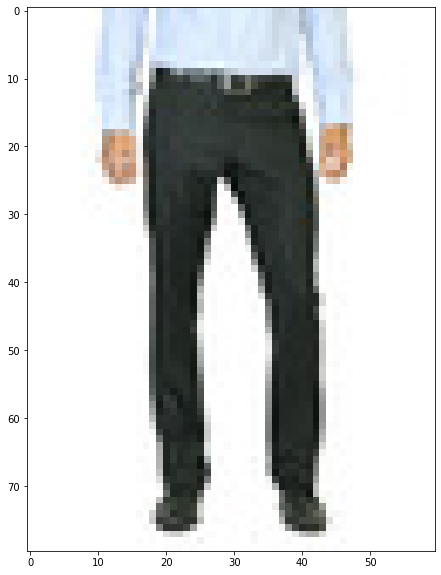

In [192]:

#img_gray  = train_gray.iloc[temp,3]
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(train_sample_df.iloc[0,1])

**checking effect of HOG on image**

In [97]:
gauss_kernel=5
orientations=8
px_per_cell=8
cells_per_block=2
block_norm='L2'
blur = cv.GaussianBlur(train_sample_df.iloc[0,1],(gauss_kernel, gauss_kernel), 0)
fd, hog_image = hog(blur, \
                    orientations = orientations, \
                    pixels_per_cell = (px_per_cell, px_per_cell), \
                    cells_per_block = (cells_per_block, cells_per_block), \
                    block_norm = block_norm, \
                    visualize = True, \
                    channel_axis = -1)

In [100]:
len(fd), type(fd)

(1728, numpy.ndarray)

<Figure size 2016x2016 with 0 Axes>

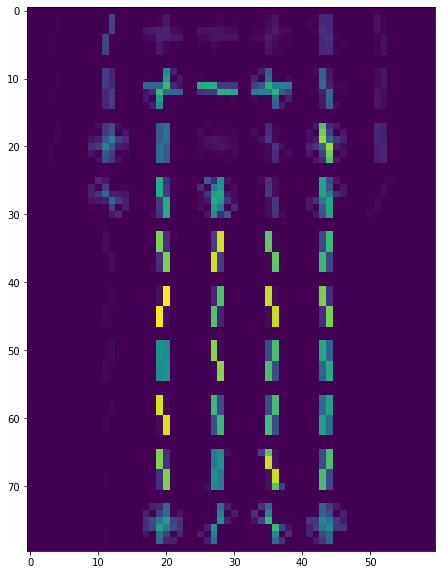

In [101]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(hog_image)

**Does removal of RGB color affet HOG output?***

In [104]:
gray_trial = cv.cvtColor(train_sample_df.iloc[0,1], cv.COLOR_BGR2GRAY)

In [107]:
gauss_kernel=5
orientations=8
px_per_cell=8
cells_per_block=2
block_norm='L2'
blur = cv.GaussianBlur(gray_trial,(gauss_kernel, gauss_kernel), 0)
fd, hog_image = hog(blur, \
                    orientations = orientations, \
                    pixels_per_cell = (px_per_cell, px_per_cell), \
                    cells_per_block = (cells_per_block, cells_per_block), \
                    block_norm = block_norm, \
                    visualize = True
                   )

In [108]:
len(fd), type(fd)

(1728, numpy.ndarray)

<Figure size 2016x2016 with 0 Axes>

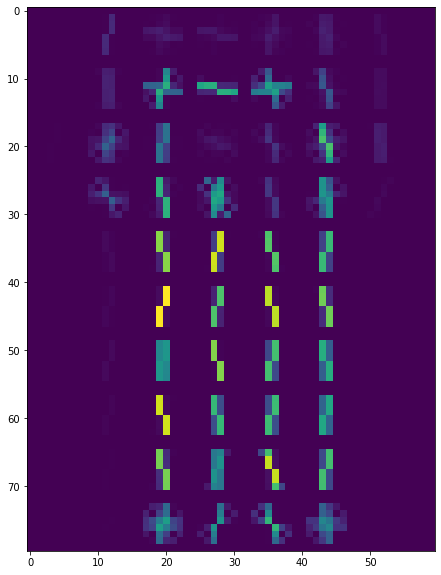

In [110]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(hog_image)

**grayscale provides same output with no loss in results**

**What about re-sizing the image?**

In [111]:
gray_trial2 = cv.resize(gray_trial, dsize=(30, 40), interpolation=cv.INTER_CUBIC)

In [112]:
gray_trial2.shape

(40, 30)

<Figure size 2016x2016 with 0 Axes>

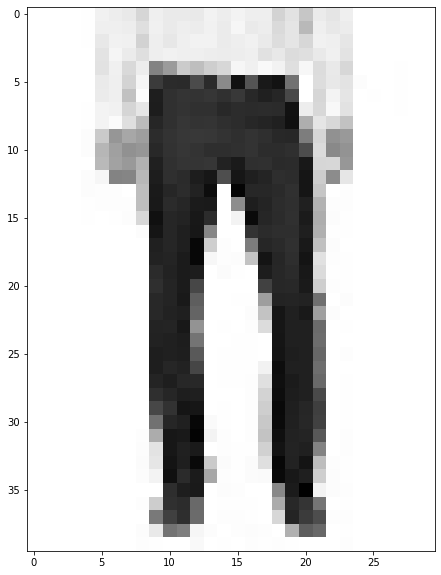

In [114]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(gray_trial2, cmap='gray')

In [115]:
gauss_kernel=5
orientations=8
px_per_cell=8
cells_per_block=2
block_norm='L2'
blur = cv.GaussianBlur(gray_trial2,(gauss_kernel, gauss_kernel), 0)
fd, hog_image = hog(blur, \
                    orientations = orientations, \
                    pixels_per_cell = (px_per_cell, px_per_cell), \
                    cells_per_block = (cells_per_block, cells_per_block), \
                    block_norm = block_norm, \
                    visualize = True
                   )

In [116]:
len(fd), type(fd)


(256, numpy.ndarray)

<Figure size 2016x2016 with 0 Axes>

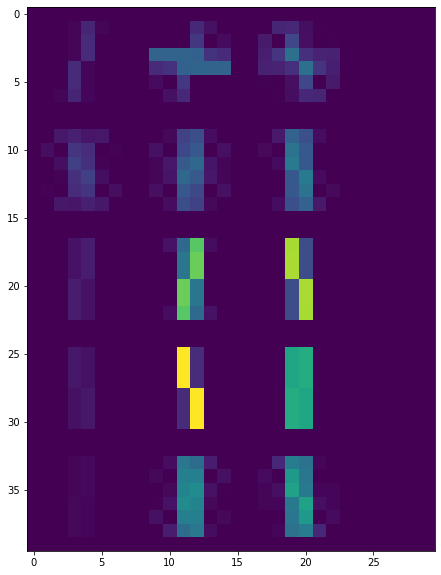

In [117]:

plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(hog_image)

**downsizing does have a negative effect on HOG output**

### We will process of all our images and keep the feature descriptor (fd)
**We will export to CSV files for later upload and use**

**Prepare DataFrames of Images for Processing**

In [118]:
train_sample_df = csv2_to_img_df(train_rgb_df, 60, 80, 3)

<Figure size 2016x2016 with 0 Axes>

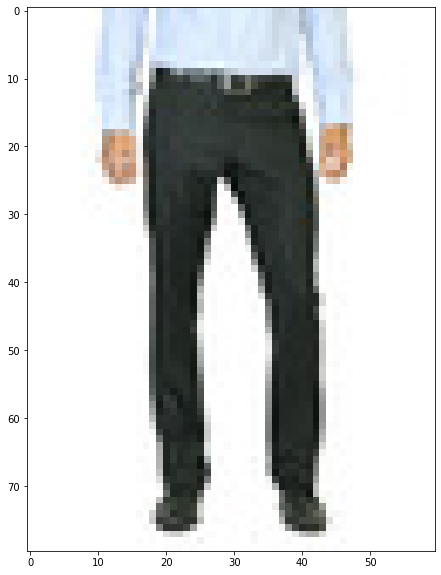

In [193]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(train_sample_df.iloc[0,1])

In [194]:
test_sample_df = csv2_to_img_df(test_rgb_df, 60, 80, 3)


<Figure size 2016x2016 with 0 Axes>

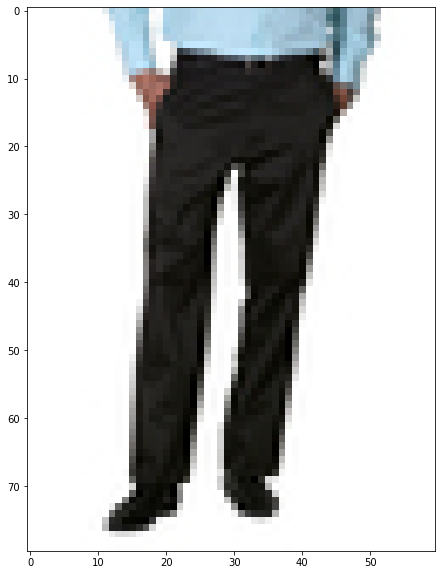

In [196]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(test_sample_df.iloc[0,1])

In [197]:
val_sample_df = csv2_to_img_df(val_rgb_df, 60, 80, 3)

**Validation to be check later**

In [198]:
train_hog_fd = RGB_hog(train_sample_df)

In [136]:
assert len(train_hog_fd) == train_sample_df.shape[0]

In [137]:
test_hog_fd = RGB_hog(test_sample_df)

In [199]:
assert len(test_hog_fd) == test_sample_df.shape[0]

In [200]:
val_hog_fd = RGB_hog(val_sample_df)

### Next step is to export to csv for later upload and use**

**need colum one list**

In [217]:
col_for_train = column_names_for_fd(train_hog_fd)

In [219]:
hog_to_csv('hog_fd_train.csv', col_for_train, train_hog_fd)

In [222]:
fd_df=pd.read_csv('hog_fd_train.csv')
fd_df.head(4)

,label,fd_value0,fd_value1,fd_value2,fd_value3,fd_value4,fd_value5,fd_value6,fd_value7,fd_value8,...,fd_value1718,fd_value1719,fd_value1720,fd_value1721,fd_value1722,fd_value1723,fd_value1724,fd_value1725,fd_value1726,fd_value1727
0,0.0,0.016479,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.705982,...,0.0,0.37049,0.002554,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.000000,0.0,0.0,0.004507,0.005494,0.0,0.0,0.0,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
col_for_test = column_names_for_fd(test_hog_fd)

In [230]:
hog_to_csv('hog_fd_test.csv', col_for_test, test_hog_fd)

In [231]:
col_for_val = column_names_for_fd(val_hog_fd)

In [232]:
hog_to_csv('hog_fd_val.csv', col_for_val, val_hog_fd)

**At this point, the features for HOG are stored in the above csv files, to be later concantenated with final vector**

### Creation of BRISK vectors 

In [233]:
def brisk_feature(images):
    '''this returns an image'''

    source = cv.BRISK_create()
    brisk_imgs = []
    for img in images:
        kp, des = source.detectAndCompute(img, None)
        imgKP = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
        brisk_imgs.append(imgKP)
    return np.array(brisk_imgs)

In [244]:
def brisk_feature2(images):
    '''this function returns the keypoint
    and descriptors for each image'''
    source = cv.BRISK_create()
    keypoints = []
    descriptors = []
    for img in images:
        kp, des = source.detectAndCompute(img, None)
        keypoints.append(kp)
        descriptors.append(des)
    return keypoints, descriptors


In [237]:

brisk_images_sample = brisk_feature(train_sample_df['image'])


**quick sanity check**

<Figure size 2016x2016 with 0 Axes>

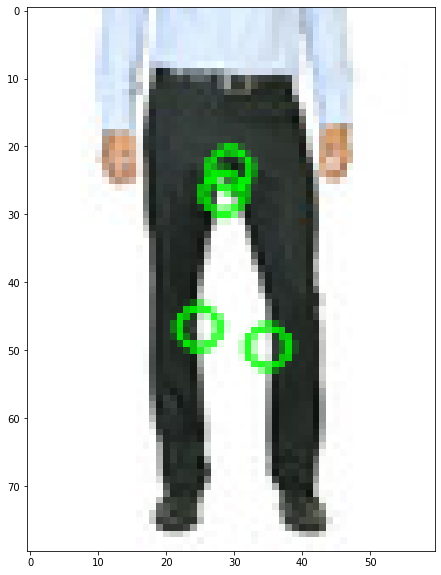

In [266]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(brisk_images_sample[0,0:])

<Figure size 2016x2016 with 0 Axes>

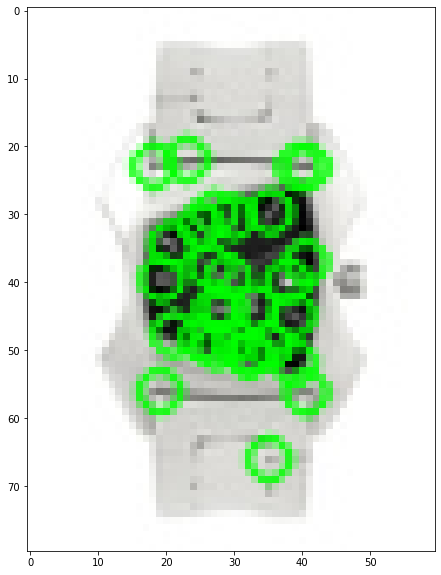

In [267]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(brisk_images_sample[1,0:])

<Figure size 2016x2016 with 0 Axes>

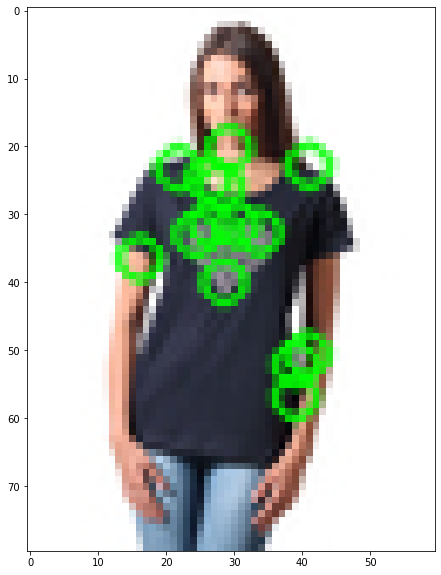

In [269]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(brisk_images_sample[4,0:])

<Figure size 2016x2016 with 0 Axes>

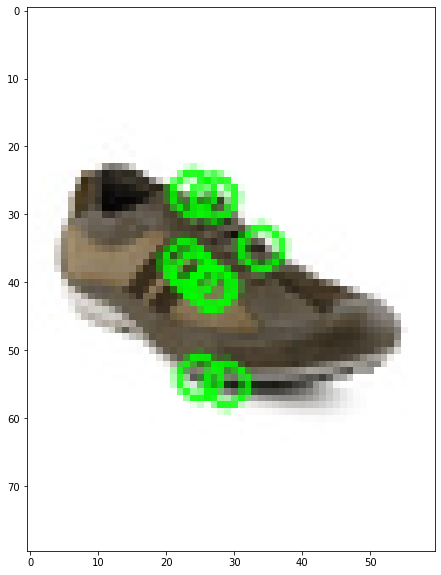

In [276]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(brisk_images_sample[11,0:])

In [245]:
kp, dp = brisk_feature2(train_sample_df['image'])

In [263]:
kp

[(< cv2.KeyPoint 0000004D5B6374B0>,
  < cv2.KeyPoint 0000004D5B4EB2A0>,
  < cv2.KeyPoint 0000004D5C780690>,
  < cv2.KeyPoint 0000004D89986390>),
 (< cv2.KeyPoint 0000004D5B547720>,
  < cv2.KeyPoint 0000004D5B547600>,
  < cv2.KeyPoint 0000004D5B5476F0>,
  < cv2.KeyPoint 0000004D5B547C60>,
  < cv2.KeyPoint 0000004D9362ED80>,
  < cv2.KeyPoint 0000004D936AF570>,
  < cv2.KeyPoint 0000004D936A4720>,
  < cv2.KeyPoint 0000004D5B62DAB0>,
  < cv2.KeyPoint 0000004D5B62D450>,
  < cv2.KeyPoint 0000004D936C3E40>,
  < cv2.KeyPoint 0000004D936C3CC0>,
  < cv2.KeyPoint 0000004D936C3BA0>,
  < cv2.KeyPoint 0000004D936C3C00>,
  < cv2.KeyPoint 0000004D936C3E10>,
  < cv2.KeyPoint 0000004D936C3BD0>,
  < cv2.KeyPoint 0000004D936C3EA0>,
  < cv2.KeyPoint 0000004D936C3B70>,
  < cv2.KeyPoint 0000004D936C3240>,
  < cv2.KeyPoint 0000004D936C37B0>,
  < cv2.KeyPoint 0000004D936C38A0>,
  < cv2.KeyPoint 0000004D936C3D50>,
  < cv2.KeyPoint 0000004D936C3750>,
  < cv2.KeyPoint 0000004D936C38D0>,
  < cv2.KeyPoint 0000004D93

**Cannot use keypoints or dp from brisk because for each image it does not output a consitent sized vector. The vector varies depending on the results of the analysis. Therefore we cannot concantenate this data to our vectors**

**lets keep the rings images only**


In [277]:
train_rgb_df.head(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel14390,pixel14391,pixel14392,pixel14393,pixel14394,pixel14395,pixel14396,pixel14397,pixel14398,pixel14399
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [315]:
img= cv.cvtColor(train_sample_df.iloc[0,1], cv.COLOR_BGR2GRAY)

In [316]:
source = cv.BRISK_create()
kp, des = source.detectAndCompute(img, None)
imgKP = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

<Figure size 2016x2016 with 0 Axes>

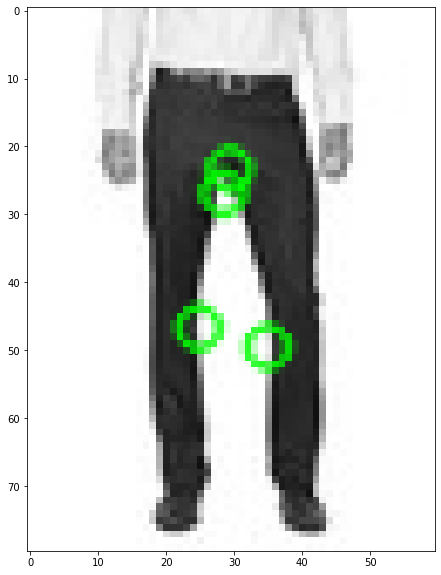

In [317]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(imgKP, cmap='gray')

In [319]:
img = cv.resize(img, dsize=(30, 40), interpolation=cv.INTER_CUBIC)

<Figure size 2016x2016 with 0 Axes>

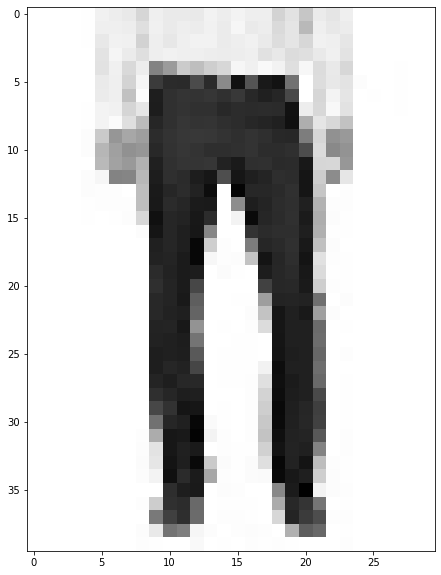

In [321]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img, cmap='gray')

In [322]:
source = cv.BRISK_create()
kp, des = source.detectAndCompute(img, None)
imgKP = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)

<Figure size 2016x2016 with 0 Axes>

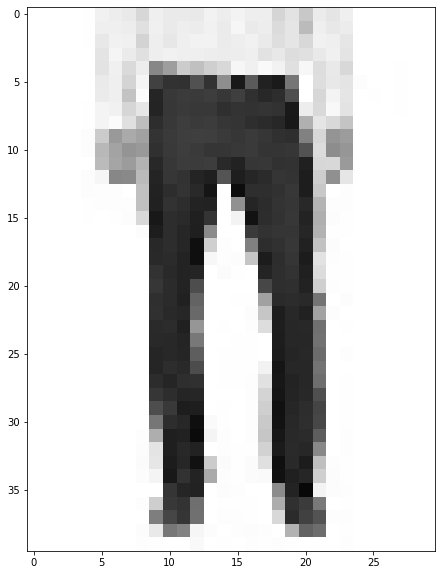

In [323]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(imgKP, cmap='gray')

**If image is too small, BRISK doesnt plot any keypoint**

### Image to convert to grayscale, do brisk on all images,  output image turned to vector, and save to csv

In [329]:
#changiing to train_rgb_df
br_tr_gray = grayscaling2(train_sample_df)
br_ts_gray = grayscaling2(test_sample_df)
br_va_gray = grayscaling2(val_sample_df)

In [331]:
#numpy arrays
brisk_img_train = brisk_feature(train_sample_df['gray_image'])
brisk_img_test = brisk_feature(test_sample_df['gray_image'])
brisk_img_val = brisk_feature(val_sample_df['gray_image'])

**Append Brisk rings to a blank image**

In [404]:
def brisk_feature2(images, width, height,channels):
    '''this appends the detected keypoints
    as white circles to a dark image'''
    bg = np.full((height, width, channels), 0, dtype=np.uint8)

    source = cv.BRISK_create()
    brisk_imgs = []
    for img in images:
        kp, des = source.detectAndCompute(img, None)
        imgKP = cv.drawKeypoints(bg, kp, None, color=(255,255,255), flags=0)
        imgKP_gray = cv.cvtColor(imgKP, cv.COLOR_BGR2GRAY)
        brisk_imgs.append(imgKP_gray)
    return np.array(brisk_imgs)

In [405]:
#numpy arrays
brisk_img_train = brisk_feature2(train_sample_df['gray_image'], 60, 80, 1)
brisk_img_test = brisk_feature2(test_sample_df['gray_image'], 60, 80, 1)
brisk_img_val = brisk_feature2(val_sample_df['gray_image'], 60, 80, 1)

In [384]:
train_sample_df.iloc[0,0]

0

In [385]:
decipher_key = {
    0:"Pants",
    1:"Tshirts",
    2:"Watches",
    3:"Casual Shoes"
 
}

<Figure size 2016x2016 with 0 Axes>

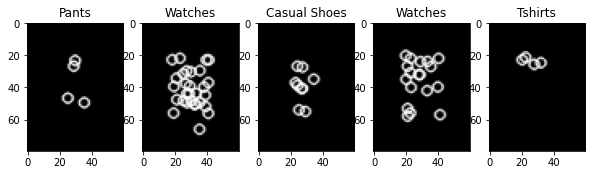

In [406]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,5, figsize=(10, 10))
axarr[0].imshow(brisk_img_train[0], cmap='gray')
axarr[0].title.set_text(decipher_key[train_sample_df.iloc[0,0]])
axarr[1].imshow(brisk_img_train[1], cmap='gray')
axarr[1].title.set_text(decipher_key[train_sample_df.iloc[1,0]])
axarr[2].imshow(brisk_img_train[11], cmap='gray')
axarr[2].title.set_text(decipher_key[train_sample_df.iloc[11,0]])
axarr[3].imshow(brisk_img_train[12], cmap='gray')
axarr[3].title.set_text(decipher_key[train_sample_df.iloc[12,0]])
axarr[4].imshow(brisk_img_train[13], cmap='gray')
axarr[4].title.set_text(decipher_key[train_sample_df.iloc[13,0]])

<Figure size 2016x2016 with 0 Axes>

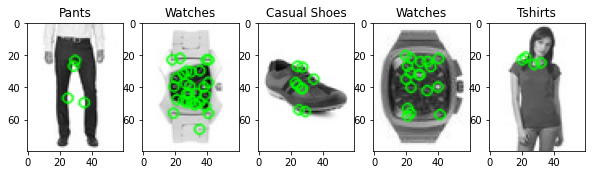

In [397]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,5, figsize=(10, 10))
axarr[0].imshow(brisk_img_train2[0], cmap='gray')
axarr[0].title.set_text(decipher_key[train_sample_df.iloc[0,0]])
axarr[1].imshow(brisk_img_train2[1], cmap='gray')
axarr[1].title.set_text(decipher_key[train_sample_df.iloc[1,0]])
axarr[2].imshow(brisk_img_train2[11], cmap='gray')
axarr[2].title.set_text(decipher_key[train_sample_df.iloc[11,0]])
axarr[3].imshow(brisk_img_train2[12], cmap='gray')
axarr[3].title.set_text(decipher_key[train_sample_df.iloc[12,0]])
axarr[4].imshow(brisk_img_train2[13], cmap='gray')
axarr[4].title.set_text(decipher_key[train_sample_df.iloc[13,0]])

<Figure size 2016x2016 with 0 Axes>

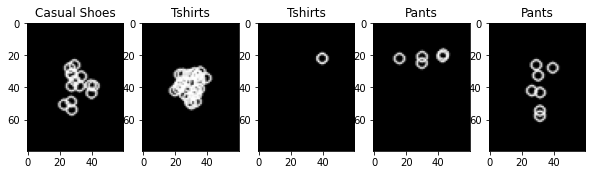

In [407]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,5, figsize=(10, 10))
axarr[0].imshow(brisk_img_train[21], cmap='gray')
axarr[0].title.set_text(decipher_key[train_sample_df.iloc[21,0]])
axarr[1].imshow(brisk_img_train[22], cmap='gray')
axarr[1].title.set_text(decipher_key[train_sample_df.iloc[22,0]])
axarr[2].imshow(brisk_img_train[23], cmap='gray')
axarr[2].title.set_text(decipher_key[train_sample_df.iloc[23,0]])
axarr[3].imshow(brisk_img_train[24], cmap='gray')
axarr[3].title.set_text(decipher_key[train_sample_df.iloc[24,0]])
axarr[4].imshow(brisk_img_train[25], cmap='gray')
axarr[4].title.set_text(decipher_key[train_sample_df.iloc[25,0]])

In [395]:
#numpy arrays
brisk_img_train2 = brisk_feature(train_sample_df['gray_image'])
brisk_img_test2 = brisk_feature(test_sample_df['gray_image'])
brisk_img_val2 = brisk_feature(val_sample_df['gray_image'])

<Figure size 2016x2016 with 0 Axes>

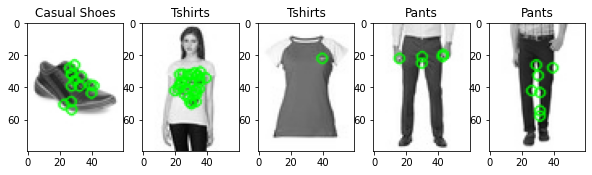

In [408]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,5, figsize=(10, 10))
axarr[0].imshow(brisk_img_train2[21], cmap='gray')
axarr[0].title.set_text(decipher_key[train_sample_df.iloc[21,0]])
axarr[1].imshow(brisk_img_train2[22], cmap='gray')
axarr[1].title.set_text(decipher_key[train_sample_df.iloc[22,0]])
axarr[2].imshow(brisk_img_train2[23], cmap='gray')
axarr[2].title.set_text(decipher_key[train_sample_df.iloc[23,0]])
axarr[3].imshow(brisk_img_train2[24], cmap='gray')
axarr[3].title.set_text(decipher_key[train_sample_df.iloc[24,0]])
axarr[4].imshow(brisk_img_train2[25], cmap='gray')
axarr[4].title.set_text(decipher_key[train_sample_df.iloc[25,0]])

In [417]:
fg1 = cv.resize(brisk_img_train[21], dsize=(30, 40), interpolation=cv.INTER_CUBIC)
fg2 = cv.resize(brisk_img_train[22], dsize=(30, 40), interpolation=cv.INTER_CUBIC)
fg3 = cv.resize(brisk_img_train[23], dsize=(30, 40), interpolation=cv.INTER_CUBIC)
fg4 = cv.resize(brisk_img_train[24], dsize=(30, 40), interpolation=cv.INTER_CUBIC)
fg5 = cv.resize(brisk_img_train[25], dsize=(30, 40), interpolation=cv.INTER_CUBIC)

In [432]:
fg1.shape

(40, 30)

<Figure size 2016x2016 with 0 Axes>

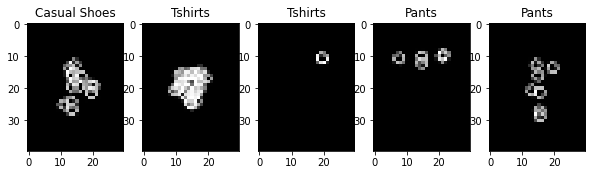

In [418]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,5, figsize=(10, 10))
axarr[0].imshow(fg1 , cmap='gray')
axarr[0].title.set_text(decipher_key[train_sample_df.iloc[21,0]])
axarr[1].imshow(fg2, cmap='gray')
axarr[1].title.set_text(decipher_key[train_sample_df.iloc[22,0]])
axarr[2].imshow(fg3 , cmap='gray')
axarr[2].title.set_text(decipher_key[train_sample_df.iloc[23,0]])
axarr[3].imshow(fg4 , cmap='gray')
axarr[3].title.set_text(decipher_key[train_sample_df.iloc[24,0]])
axarr[4].imshow(fg5, cmap='gray')
axarr[4].title.set_text(decipher_key[train_sample_df.iloc[25,0]])

<Figure size 2016x2016 with 0 Axes>

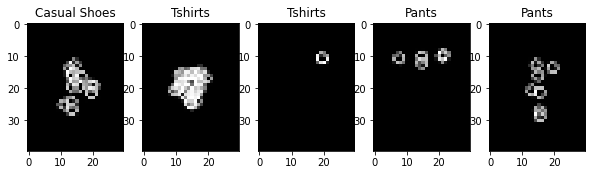

In [438]:
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,5, figsize=(10, 10))
axarr[0].imshow(brisk_img_train[21], cmap='gray')
axarr[0].title.set_text(decipher_key[train_sample_df.iloc[21,0]])
axarr[1].imshow(brisk_img_train[22], cmap='gray')
axarr[1].title.set_text(decipher_key[train_sample_df.iloc[22,0]])
axarr[2].imshow(brisk_img_train[23], cmap='gray')
axarr[2].title.set_text(decipher_key[train_sample_df.iloc[23,0]])
axarr[3].imshow(brisk_img_train[24], cmap='gray')
axarr[3].title.set_text(decipher_key[train_sample_df.iloc[24,0]])
axarr[4].imshow(brisk_img_train[25], cmap='gray')
axarr[4].title.set_text(decipher_key[train_sample_df.iloc[25,0]])

In [444]:
brisk_img_train = [cv.resize(img, dsize=(30, 40), interpolation=cv.INTER_CUBIC) for img in brisk_img_train]
brisk_img_test = [cv.resize(img, dsize=(30, 40), interpolation=cv.INTER_CUBIC) for img in brisk_img_test]
brisk_img_val = [cv.resize(img, dsize=(30, 40), interpolation=cv.INTER_CUBIC) for img in brisk_img_val]


**Convert results to vector format**

In [457]:
def brisk_column_names(brisk_np, base):
    '''returns a list with the labels on image_df with grayscale format'''
    im_length =  brisk_np[0].shape[0]*brisk_np[0].shape[1]*1 #grayscale
    column_name =[]
    column_name.append('label')
    for i in range(im_length):
        c_name = base+str(i)
        column_name.append(c_name)
    return column_name

In [458]:
def brisk_images_to_csv(csv_path, column_names, images_df, brisk_np):
    '''encodes an gray scale image dataset images_df into rows in a CSV file.
    first column is label and the first pixel is on column 2'''
    warnings.simplefilter(action='ignore', category=FutureWarning)
    df = pd.DataFrame(columns=column_names)
    start_time = time.time()
    for i in range(images_df.shape[0]):
    #for i in range(5):
        # Convert image data to a 1D array
        img_data = brisk_np[i]
        img_data = np.reshape(img_data, (1, img_data.shape[0]*img_data.shape[1]))
        img_data = img_data.astype(int)

        # Create a DataFrame with the label and image data
        img_df = pd.DataFrame([np.insert(img_data, 0, images_df.iloc[i,0])], columns=column_names)

        # Append the image data to the main DataFrame
        df = df.append(img_df, ignore_index=True)
        #df.head(1)
        print('percent complete: %1.4f'%(i/(images_df.shape[0])), end =" - %s seconds -\r" % \
              round((time.time() - start_time),2), flush=True)
    # Write DataFrame to CSV
    #df=df.clip(lower=0)
    df.to_csv(csv_path, index=False, header=True)  

In [449]:
train_sample_df.head(1)

,label,image,gray_image
0,0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [460]:
brisk_col = brisk_column_names(brisk_img_train, 'brisk')

In [ ]:
brisk_images_to_csv('brisk_train.csv',brisk_col, train_sample_df, brisk_img_train)

**test files**

In [472]:
brisc_df = pd.read_csv('brisk_train.csv')
brisc_df.head(1)

,label,brisk0,brisk1,brisk2,brisk3,brisk4,brisk5,brisk6,brisk7,brisk8,...,brisk1190,brisk1191,brisk1192,brisk1193,brisk1194,brisk1195,brisk1196,brisk1197,brisk1198,brisk1199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 2016x2016 with 0 Axes>

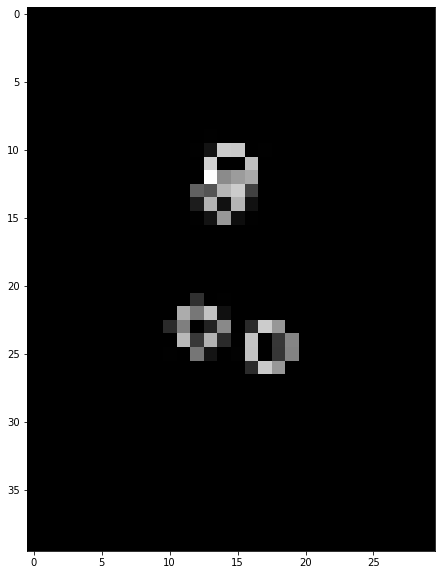

In [476]:
temp=0
brisk_img = brisc_df.iloc[temp, 1:].values
brisk_img = np.reshape(brisk_img, (40, 30))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(brisk_img, cmap='gray')

<Figure size 2016x2016 with 0 Axes>

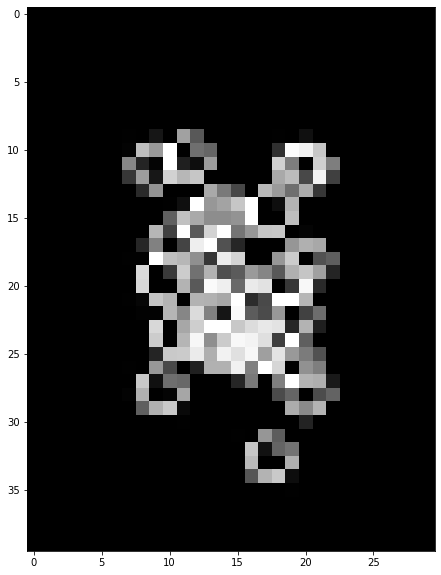

In [477]:
temp=1
brisk_img = brisc_df.iloc[temp, 1:].values
brisk_img = np.reshape(brisk_img, (40, 30))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(brisk_img, cmap='gray')

**Save the rest**

In [478]:
brisk_col = brisk_column_names(brisk_img_test, 'brisk')

In [479]:
brisk_images_to_csv('brisk_test.csv',brisk_col, test_sample_df, brisk_img_test)

In [480]:
brisk_col = brisk_column_names(brisk_img_val, 'brisk')
brisk_images_to_csv('brisk_val.csv',brisk_col, val_sample_df, brisk_img_val)

**now we can concantenate the BRISK feature with our other vectors**

### Create grayscale version

**Convert RGB images to Gray scale images and reduce size**

We had previously inserted a gray scale images into our RGB dataframes.

We insert a dummy column into the previously created dataframe in order to match the expected input of our function.

Our function will save the gray scale images to CSV

In [485]:
train_gray = train_sample_df.copy()

In [486]:
articleType = ['default_value'] * len(train_gray)

# Insert the new column at the specific location
train_gray.insert(1, 'articleType', articleType)
train_gray.head()

,label,articleType,image,gray_image
0,0,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,2,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,2,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,3,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,1,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [487]:
train_gray.iloc[0,3].shape

(80, 60)

<Figure size 2016x2016 with 0 Axes>

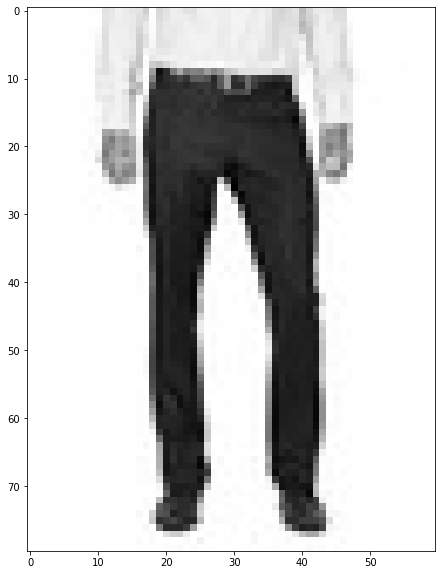

In [488]:
temp =0
img_gray  = train_gray.iloc[temp,3]
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_gray, cmap='gray')

**Resize the images to 30x40 from 60x80**

In [489]:
train_gray = resize_dataset_gray(train_gray, 30, 40)

<Figure size 2016x2016 with 0 Axes>

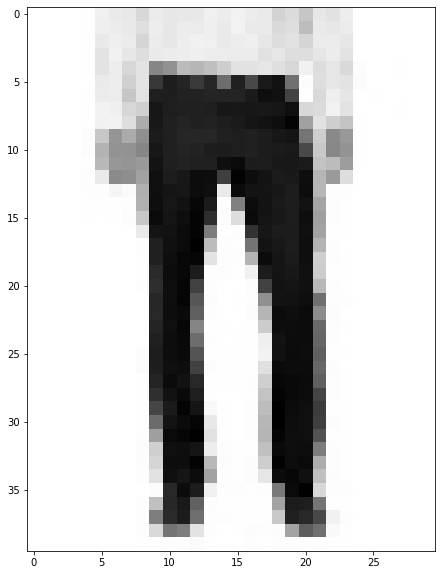

In [490]:
temp =0
img_gray  = train_gray.iloc[temp,3]
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_gray, cmap='gray')

**Get the names for each column, and its label**

In [497]:
col_name = gray_column_names(train_gray)



In [494]:

col_one_name = train_gray['label']


In [501]:
gray_images_to_csv2(col_one_name, 'gray_small_train_set.csv', col_name, train_gray)

**Sanity check**

In [9]:
gtrain = pd.read_csv('gray_small_train_set.csv')
gtrain.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1190,pixel1191,pixel1192,pixel1193,pixel1194,pixel1195,pixel1196,pixel1197,pixel1198,pixel1199
0,0,255,255,255,255,254,241,236,234,220,...,253,253,254,254,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,1,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [10]:
gtrain.shape

(3377, 1201)

<Figure size 2016x2016 with 0 Axes>

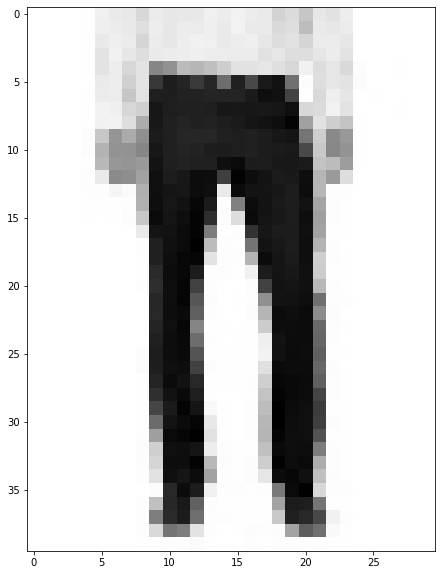

In [11]:
temp=0

img_gray  = np.reshape(gtrain.iloc[temp,1:].values, newshape=(40,30))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_gray, cmap='gray')
#axarr[1].imshow(train_data.iloc[temp,3], cmap='gray')

**Do the same for test and validation data set**

In [505]:
test_gray = test_sample_df.copy()

articleType = ['default_value'] * len(test_gray)

# Insert the new column at the specific location
test_gray.insert(1, 'articleType', articleType)
test_gray.head()

,label,articleType,image,gray_image
0,0,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
1,1,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,0,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 251,..."
3,3,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
4,1,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [506]:
#test_gray = grayscaling(test_data)
test_gray = resize_dataset_gray(test_gray, 30, 40)
col_name = gray_column_names(test_gray)
col_one_name = test_gray['label']
gray_images_to_csv2(col_one_name, 'gray_small_test_set.csv', col_name, test_gray)

In [4]:
gtest = pd.read_csv('gray_small_test_set.csv')
gtest.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1190,pixel1191,pixel1192,pixel1193,pixel1194,pixel1195,pixel1196,pixel1197,pixel1198,pixel1199
0,0,255,255,255,255,254,250,217,214,201,...,255,255,255,255,255,255,255,255,255,255
1,1,255,255,255,255,255,255,255,255,254,...,248,253,253,253,255,255,255,255,255,255
2,0,255,255,255,255,253,253,202,201,202,...,254,254,255,254,255,255,255,255,255,255
3,3,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,1,255,255,255,255,255,255,255,255,252,...,250,250,252,254,255,255,255,255,255,255


<Figure size 2016x2016 with 0 Axes>

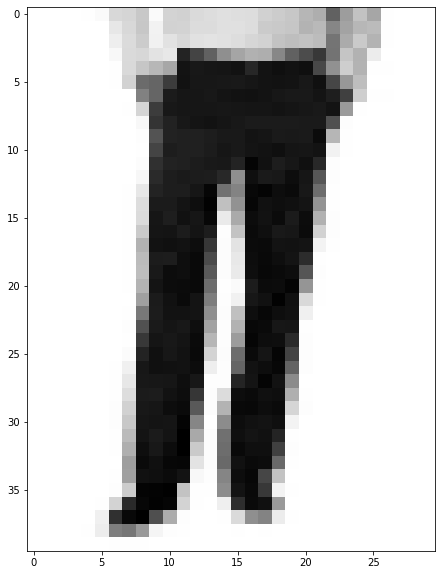

In [513]:
temp=0

img_gray  = np.reshape(gtest.iloc[temp,1:].values, newshape=(40,30))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_gray, cmap='gray')
#axarr[1].imshow(train_data.iloc[temp,3], cmap='gray')

**Validation set convert to grayscale**

In [509]:
val_gray = val_sample_df.copy()

articleType = ['default_value'] * len(val_gray)

# Insert the new column at the specific location
val_gray.insert(1, 'articleType', articleType)
val_gray.head()

,label,articleType,image,gray_image
0,0,default_value,"[[[255, 255, 246], [255, 255, 250], [252, 255,...","[[252, 254, 255, 255, 254, 254, 254, 255, 254,..."
1,2,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
2,2,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
3,0,default_value,"[[[255, 252, 251], [251, 250, 255], [255, 254,...","[[252, 252, 254, 251, 254, 254, 250, 180, 188,..."
4,0,default_value,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [515]:
#val_gray = grayscaling(validation_data)
val_gray = resize_dataset_gray(val_gray, 30, 40)
col_name = gray_column_names(val_gray)
col_one_name = val_gray['label']
gray_images_to_csv2(col_one_name, 'gray_small_val_set.csv', col_name, val_gray)

In [516]:
gval = pd.read_csv('gray_small_val_set.csv')
gval.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel1190,pixel1191,pixel1192,pixel1193,pixel1194,pixel1195,pixel1196,pixel1197,pixel1198,pixel1199
0,0,253,255,254,255,251,205,184,153,242,...,249,250,251,253,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,2,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,0,253,253,254,212,192,155,208,188,132,...,255,254,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,254,231,236,216,...,255,255,255,255,255,255,255,255,255,255


<Figure size 2016x2016 with 0 Axes>

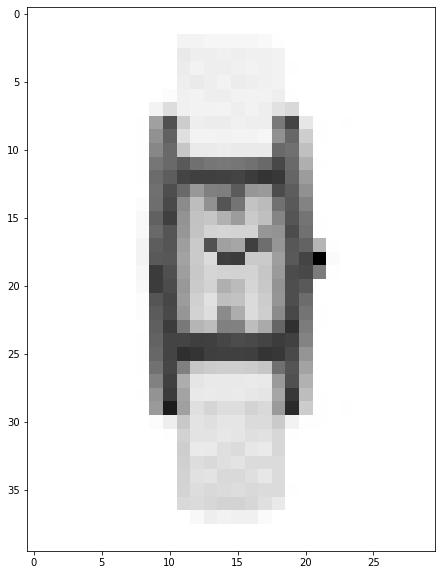

In [518]:
temp=2

img_gray  = np.reshape(gval.iloc[temp,1:].values, newshape=(40,30))
plt.figure(figsize = (28,28))
f, axarr = plt.subplots(1,1, figsize=(10, 10))
axarr.imshow(img_gray, cmap='gray')
#axarr[1].imshow(train_data.iloc[temp,3], cmap='gray')